# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Lists and counters
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_list = []
windspeed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_list.append(response['main']['temp_max'])
        windspeed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : busselton
Processing Record 2 of Set 1 : jamestown
Processing Record 3 of Set 1 : ushuaia
Processing Record 4 of Set 1 : erdemli
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : acapulco
Processing Record 7 of Set 1 : charters towers
City not found. Skipping...
Processing Record 8 of Set 1 : guilin
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : egvekinot
Processing Record 11 of Set 1 : rawson
Processing Record 12 of Set 1 : todos santos
Processing Record 13 of Set 1 : santa maria
Processing Record 14 of Set 1 : brufut
Processing Record 15 of Set 1 : belomorsk
Processing Record 16 of Set 1 : kavaratti
Processing Record 17 of Set 1 : sorland
Processing Record 18 of Set 1 : raymondville
City not found. Skipping...
Processing Record 19 of Set 1 : wajir
Processing Record 20 of Set 1 : cape canaveral
City not found. Skipping...
Processing Record 21 of Set

Processing Record 34 of Set 4 : saldanha
Processing Record 35 of Set 4 : thanh hoa
Processing Record 36 of Set 4 : nanortalik
Processing Record 37 of Set 4 : fort nelson
Processing Record 38 of Set 4 : korla
Processing Record 39 of Set 4 : yarega
Processing Record 40 of Set 4 : baculin
Processing Record 41 of Set 4 : tynda
Processing Record 42 of Set 4 : chornukhy
City not found. Skipping...
Processing Record 43 of Set 4 : clyde river
Processing Record 44 of Set 4 : lebu
City not found. Skipping...
Processing Record 45 of Set 4 : hualmay
Processing Record 46 of Set 4 : tuatapere
Processing Record 47 of Set 4 : hay river
Processing Record 48 of Set 4 : ancud
Processing Record 49 of Set 4 : la mana
Processing Record 50 of Set 4 : kanash
Processing Record 0 of Set 5 : lagos
Processing Record 1 of Set 5 : mbour
Processing Record 2 of Set 5 : mar del plata
Processing Record 3 of Set 5 : graaff-reinet
Processing Record 4 of Set 5 : bethel
Processing Record 5 of Set 5 : dungarvan
Processing R

Processing Record 16 of Set 8 : sola
Processing Record 17 of Set 8 : jiwani
Processing Record 18 of Set 8 : cidreira
Processing Record 19 of Set 8 : mehamn
Processing Record 20 of Set 8 : elat
Processing Record 21 of Set 8 : moindou
Processing Record 22 of Set 8 : biasca
Processing Record 23 of Set 8 : williston
Processing Record 24 of Set 8 : paita
Processing Record 25 of Set 8 : nelson bay
Processing Record 26 of Set 8 : mackay
Processing Record 27 of Set 8 : kandrian
Processing Record 28 of Set 8 : yining
Processing Record 29 of Set 8 : hirara
Processing Record 30 of Set 8 : yelovo
Processing Record 31 of Set 8 : zhanaozen
Processing Record 32 of Set 8 : sindor
Processing Record 33 of Set 8 : shaowu
Processing Record 34 of Set 8 : masyaf
Processing Record 35 of Set 8 : challans
Processing Record 36 of Set 8 : katsuura
Processing Record 37 of Set 8 : santa cruz
Processing Record 38 of Set 8 : benalla
Processing Record 39 of Set 8 : bayan
Processing Record 40 of Set 8 : wanning
Proces

Processing Record 2 of Set 12 : tomatlan
Processing Record 3 of Set 12 : homer
Processing Record 4 of Set 12 : anajatuba
Processing Record 5 of Set 12 : baturite
Processing Record 6 of Set 12 : calbuco
Processing Record 7 of Set 12 : faya
Processing Record 8 of Set 12 : carutapera
Processing Record 9 of Set 12 : ketchikan
Processing Record 10 of Set 12 : shimoda
Processing Record 11 of Set 12 : ngunguru
Processing Record 12 of Set 12 : gravdal
Processing Record 13 of Set 12 : bani walid
Processing Record 14 of Set 12 : dire
Processing Record 15 of Set 12 : mahajanga
Processing Record 16 of Set 12 : warrington
Processing Record 17 of Set 12 : orodara
Processing Record 18 of Set 12 : adwa
Processing Record 19 of Set 12 : kailua
Processing Record 20 of Set 12 : marsa matruh
Processing Record 21 of Set 12 : lampang
Processing Record 22 of Set 12 : nioro
Processing Record 23 of Set 12 : williams lake
Processing Record 24 of Set 12 : sisimiut
Processing Record 25 of Set 12 : skjervoy
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Create a dataframe using information from data retrieval
weather_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Temperature Max" : temp_list,
    "Humidity" : humidity_list,
    "Clouds" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Country" : country_list,
    "Date" : date_list    
})

In [6]:
weather_df.count()

City               594
Lat                594
Lng                594
Temperature Max    594
Humidity           594
Clouds             594
Wind Speed         594
Country            594
Date               594
dtype: int64

In [7]:
weather_df.head()

,City,Lat,Lng,Temperature Max,Humidity,Clouds,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,50.09,77,92,4.70,AU,1635027095
1,Jamestown,42.0970,-79.2353,46.29,97,90,1.99,US,1635027096
2,Ushuaia,-54.8000,-68.3000,33.46,93,75,18.41,AR,1635027096
3,Erdemli,36.6050,34.3084,70.21,38,0,3.27,TR,1635027096
4,Rikitea,-23.1203,-134.9692,74.88,82,97,20.09,PF,1635027097


In [8]:
#Save weather data to a cities csv file
weather_df.to_csv("../WeatherPy/output.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
test = weather_df["Humidity"].describe(include = "all")
print("The maximum humidity value is 100%")
test

The maximum humidity value is 100%


count    594.000000
mean      72.796296
std       18.846963
min       14.000000
25%       64.000000
50%       76.000000
75%       87.750000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

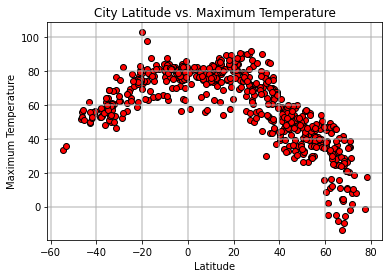

In [11]:
#Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Temperature Max"], color = "red", edgecolor = "black")

plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../Images/lat_temp.png")

## Latitude vs. Humidity Plot

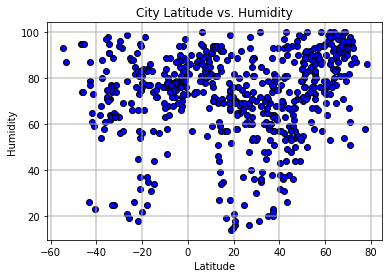

In [12]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "blue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

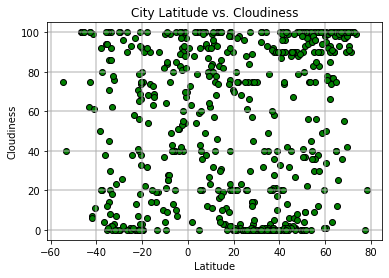

In [13]:
#Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Clouds"], color = "green", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../Images/lat_cloud.png")

## Latitude vs. Wind Speed Plot

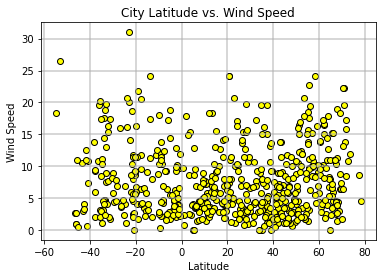

In [14]:
#Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "yellow", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../Images/lat_speed.png")

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

In [16]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


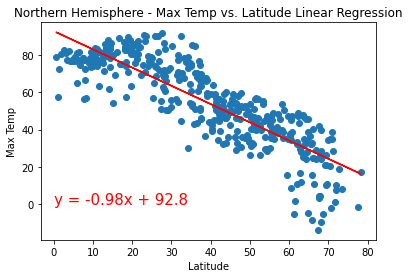

In [17]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern_df["Lat"], northern_df["Temperature Max"])
annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/north_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.75


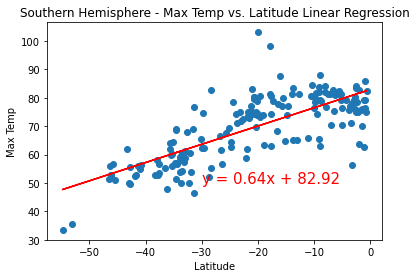

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern_df["Lat"], southern_df["Temperature Max"])
annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("../Images/south_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.22


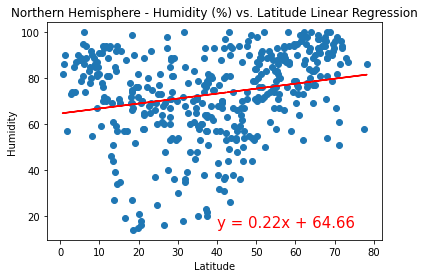

In [19]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern_df["Lat"], northern_df["Humidity"])
annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/north_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


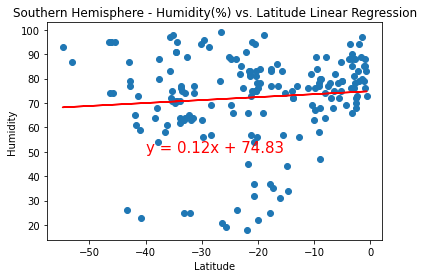

In [20]:
# Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression
equation = linear_agression(southern_df["Lat"], southern_df["Humidity"])
annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../Images/south_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


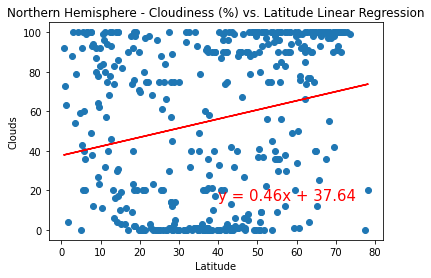

In [21]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern_df["Lat"], northern_df["Clouds"])
annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig("../Images/north_clouds.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


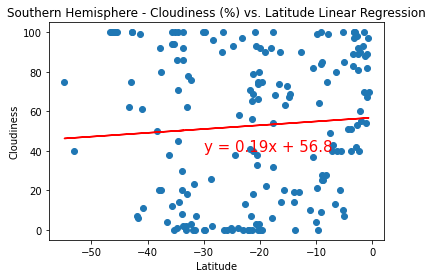

In [25]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(southern_df["Lat"], southern_df["Clouds"])
annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../Images/south_clouds.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.19


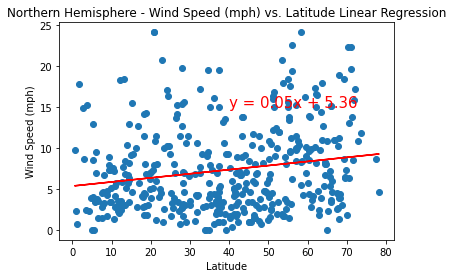

In [23]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(northern_df["Lat"], northern_df["Wind Speed"])
annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/north_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.13


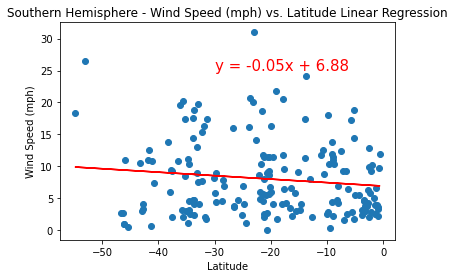

In [24]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern_df["Lat"], southern_df["Wind Speed"])
annotate(equation, -30, 25)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/south_wind.png")